In [27]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.api as sta
import matplotlib.pyplot as plt

In [2]:
PATH="/mnt/c/Users/Utente/OneDrive/Desktop/Codes/Bazzani/coin_Bitcoin.csv"
bitcoin=pd.read_csv(PATH,sep=",")
lista=["Name","Symbol","High","Low","Open","Volume","Marketcap"]
for i in lista:
    del bitcoin[i]
bitcoin

,SNo,Date,Close
0,1,2013-04-29 23:59:59,144.539993
1,2,2013-04-30 23:59:59,139.000000
2,3,2013-05-01 23:59:59,116.989998
3,4,2013-05-02 23:59:59,105.209999
4,5,2013-05-03 23:59:59,97.750000
...,...,...,...
2986,2987,2021-07-02 23:59:59,33897.048590
2987,2988,2021-07-03 23:59:59,34668.548402
2988,2989,2021-07-04 23:59:59,35287.779766
2989,2990,2021-07-05 23:59:59,33746.002456


<Axes: xlabel='SNo'>

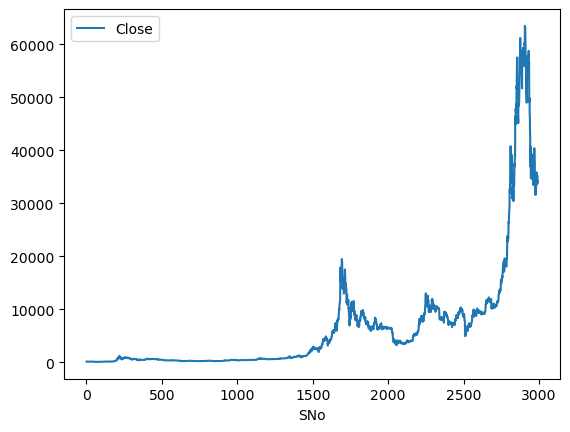

In [3]:
bitcoin.plot(x="SNo",y="Close")

In [4]:
bitcoin_first=bitcoin[:500]
bitcoin_first

,SNo,Date,Close
0,1,2013-04-29 23:59:59,144.539993
1,2,2013-04-30 23:59:59,139.000000
2,3,2013-05-01 23:59:59,116.989998
3,4,2013-05-02 23:59:59,105.209999
4,5,2013-05-03 23:59:59,97.750000
...,...,...,...
495,496,2014-09-06 23:59:59,484.829987
496,497,2014-09-07 23:59:59,482.278015
497,498,2014-09-08 23:59:59,474.600006
498,499,2014-09-09 23:59:59,475.260010


In [5]:
bitcoin_second=bitcoin[500:1000]
bitcoin_second

,SNo,Date,Close
500,501,2014-09-11 23:59:59,479.748993
501,502,2014-09-12 23:59:59,477.752991
502,503,2014-09-13 23:59:59,479.002014
503,504,2014-09-14 23:59:59,477.891998
504,505,2014-09-15 23:59:59,475.371002
...,...,...,...
995,996,2016-01-19 23:59:59,380.148987
996,997,2016-01-20 23:59:59,420.230011
997,998,2016-01-21 23:59:59,410.261993
998,999,2016-01-22 23:59:59,382.492004


In [6]:
bitcoin_third=bitcoin[1000:1500]
bitcoin_third

,SNo,Date,Close
1000,1001,2016-01-24 23:59:59,402.971008
1001,1002,2016-01-25 23:59:59,391.726013
1002,1003,2016-01-26 23:59:59,392.153015
1003,1004,2016-01-27 23:59:59,394.971985
1004,1005,2016-01-28 23:59:59,380.289001
...,...,...,...
1495,1496,2017-06-02 23:59:59,2488.550049
1496,1497,2017-06-03 23:59:59,2515.350098
1497,1498,2017-06-04 23:59:59,2511.810059
1498,1499,2017-06-05 23:59:59,2686.810059


In [7]:
bitcoin_fourth=bitcoin[1500:2000]
bitcoin_fourth

,SNo,Date,Close
1500,1501,2017-06-07 23:59:59,2732.159912
1501,1502,2017-06-08 23:59:59,2805.620117
1502,1503,2017-06-09 23:59:59,2823.810059
1503,1504,2017-06-10 23:59:59,2947.709961
1504,1505,2017-06-11 23:59:59,2958.110107
...,...,...,...
1995,1996,2018-10-15 23:59:59,6596.540000
1996,1997,2018-10-16 23:59:59,6596.110000
1997,1998,2018-10-17 23:59:59,6544.430000
1998,1999,2018-10-18 23:59:59,6476.710000


In [8]:
bitcoin_fifth=bitcoin[2000:2500]
bitcoin_fifth

,SNo,Date,Close
2000,2001,2018-10-20 23:59:59,6489.190000
2001,2002,2018-10-21 23:59:59,6482.350000
2002,2003,2018-10-22 23:59:59,6487.160000
2003,2004,2018-10-23 23:59:59,6475.740000
2004,2005,2018-10-24 23:59:59,6495.840000
...,...,...,...
2495,2496,2020-02-27 23:59:59,8784.493849
2496,2497,2020-02-28 23:59:59,8672.455350
2497,2498,2020-02-29 23:59:59,8599.508620
2498,2499,2020-03-01 23:59:59,8562.454050


In [9]:
bitcoin_six=bitcoin[2500:]
bitcoin_six

,SNo,Date,Close
2500,2501,2020-03-03 23:59:59,8787.786456
2501,2502,2020-03-04 23:59:59,8755.245895
2502,2503,2020-03-05 23:59:59,9078.762792
2503,2504,2020-03-06 23:59:59,9122.545573
2504,2505,2020-03-07 23:59:59,8909.953651
...,...,...,...
2986,2987,2021-07-02 23:59:59,33897.048590
2987,2988,2021-07-03 23:59:59,34668.548402
2988,2989,2021-07-04 23:59:59,35287.779766
2989,2990,2021-07-05 23:59:59,33746.002456


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

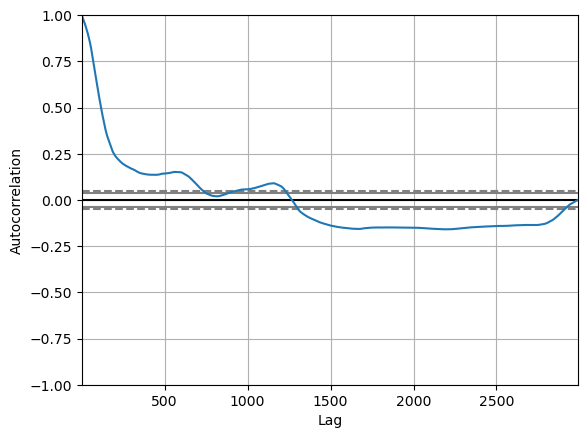

In [10]:
pd.plotting.autocorrelation_plot(bitcoin["Close"])

In [11]:
bitcoin.describe()

,SNo,Close
count,2991.000000,2991.000000
mean,1496.000000,6711.290443
std,863.571653,11298.141921
min,1.000000,68.431000
25%,748.500000,430.569489
50%,1496.000000,2286.409912
75%,2243.500000,8576.238715
max,2991.000000,63503.457930


In [12]:
bitcoin_fourth.describe()

,SNo,Close
count,500.000000,500.000000
mean,1750.500000,7335.671520
std,144.481833,3445.243061
min,1501.000000,1929.819946
25%,1625.750000,4815.357544
50%,1750.500000,6770.334961
75%,1875.250000,8730.597412
max,2000.000000,19497.400391


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

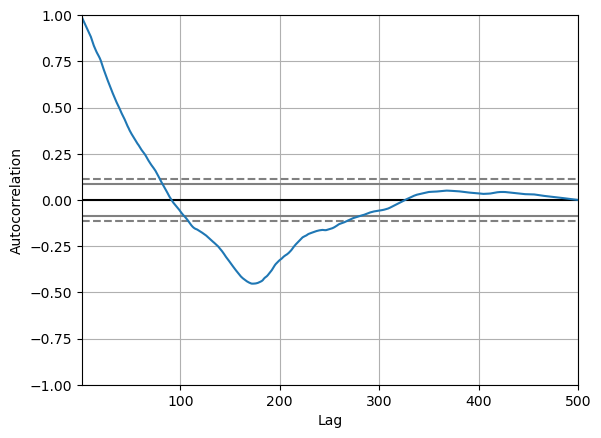

In [13]:
pd.plotting.autocorrelation_plot(bitcoin_fourth["Close"])

In [33]:
mod= sta.arima.ARIMA(bitcoin["Close"],order=(1,1,1))
res=mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2991
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -23298.832
Date:                Fri, 14 Apr 2023   AIC                          46603.664
Time:                        16:03:20   BIC                          46621.673
Sample:                             0   HQIC                         46610.143
                               - 2991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5691      0.052    -10.934      0.000      -0.671      -0.467
ma.L1          0.4969      0.056      8.883      0.000       0.387       0.607
sigma2      3.446e+05   1968.830    175.007      0.0

In [42]:
bitcoin_first_=bitcoin_first[:10]
mod1= sta.arima.ARIMA(bitcoin_first_["Close"],order=(1,1,1))
res1=mod1.fit()
print(res1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   10
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -32.889
Date:                Fri, 14 Apr 2023   AIC                             71.779
Time:                        17:02:03   BIC                             72.370
Sample:                             0   HQIC                            70.502
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2231      1.698      0.131      0.895      -3.104       3.551
ma.L1          0.2094      1.930      0.109      0.914      -3.572       3.991
sigma2        85.6310     36.608      2.339      0.0

In [45]:
forecast=res1.forecast(10)
print(forecast)
for i,j in forecast,range(forecast):
    print(bitcoin_first["Close"][10+j]-i)

10    114.463375
11    114.663597
12    114.708270
13    114.718237
14    114.720461
15    114.720958
16    114.721068
17    114.721093
18    114.721099
19    114.721100
Name: predicted_mean, dtype: float64


TypeError: 'Series' object cannot be interpreted as an integer

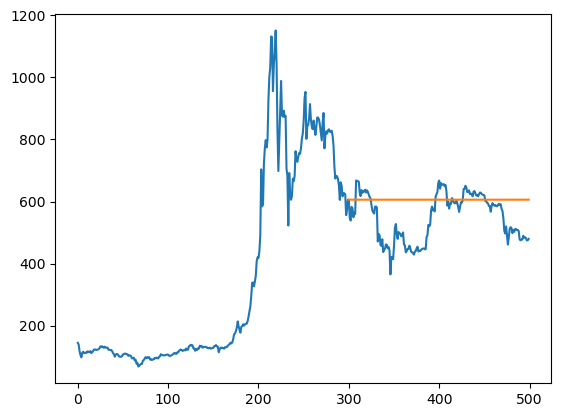

In [40]:
plt.plot(bitcoin_first["Close"])
plt.plot(forecast)